# Setup

In [1]:
import scanpy as sc
import scvi
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd

Global seed set to 0


In [2]:
sc.set_figure_params(figsize=(4,4),  dpi=150, dpi_save=300, facecolor="white", frameon=False)
sns.set_context("paper")
plt.rcParams["axes.grid"] = False
warnings.simplefilter(action='ignore', category=FutureWarning)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [3]:
os.getcwd()

'/notebook/Joe/M-cells/code'

# import data

In [4]:
adata = sc.read("/notebook/External/Archive/Joe/processed_data/M_cell/h5ad_files/combined_WT_1511_genes.h5ad")
model = scvi.model.SCVI.load("/notebook/External/Archive/Joe/processed_data/M_cell/scVI_models/combined_WT_1511_genes", adata=adata, use_gpu=True)

INFO     File /notebook/External/Archive/Joe/processed_data/M_cell/scVI_models/combined_WT_15
         11_genes/model.pt already downloaded                                                


In [5]:
adata.obs

,batch,scrublet_score,scrublet_called_doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_genes,_scvi_batch,_scvi_labels,leiden_scVI,cell_type
AAACCCAAGCCACCGT-1,Corey,0.061150,False,4330,22888.0,411.0,1.795701,4330,0,0,0,Aire+ 2
AAACCCAAGCTGCCAC-1,Corey,0.088096,False,2657,7073.0,297.0,4.199067,2657,0,0,5,Ccl21a+
AAACCCACACGTAGAG-1,Corey,0.088096,False,4818,20949.0,1606.0,7.666237,4818,0,0,1,Late Aire
AAACCCACACTCCCTA-1,Corey,0.116656,False,2066,6615.0,80.0,1.209373,2066,0,0,1,Late Aire
AAACCCACATTGACTG-1,Corey,0.077549,False,3973,12769.0,573.0,4.487431,3973,0,0,3,PA 2 (Tspan8)
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCAGGGTCTC-1,Yi,0.064776,False,4534,20422.0,575.0,2.815591,4534,1,0,4,Aire+ 1
TTTGTTGCAGTATGAA-1,Yi,0.094163,False,2455,7366.0,217.0,2.945968,2455,1,0,7,PA 3 (Ascl1)
TTTGTTGGTACGTTCA-1,Yi,0.085275,False,3989,11545.0,358.0,3.100909,3989,1,0,3,PA 2 (Tspan8)
TTTGTTGGTCAGGCAA-1,Yi,0.091056,False,3079,12522.0,280.0,2.236064,3079,1,0,0,Aire+ 2


In [6]:
de_df = model.differential_expression(
    groupby="cell_type",
)

DE...: 100%|██████████| 10/10 [00:05<00:00,  1.86it/s]


In [7]:
de_df

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
Arhgap36,0.9882,0.0118,4.427785,0.000100,0.000006,0.0,0.25,8.285682,8.495284,5.646738,...,0.060153,0.003171,0.010431,0.001269,0.431386,0.036764,True,Aire+ 2 vs Rest,Aire+ 2,Rest
Ctsll3,0.9868,0.0132,4.314250,0.000143,0.000007,0.0,0.25,7.851635,7.716707,6.056364,...,0.067803,0.002537,0.007650,0.001269,0.454883,0.025965,True,Aire+ 2 vs Rest,Aire+ 2,Rest
Pdc,0.9858,0.0142,4.240211,0.000174,0.000009,0.0,0.25,7.666281,7.458510,5.292522,...,0.052503,0.000761,0.010083,0.000634,0.492359,0.005736,True,Aire+ 2 vs Rest,Aire+ 2,Rest
B020004C17Rik,0.9858,0.0142,4.240211,0.000071,0.000002,0.0,0.25,7.804495,7.851537,5.755892,...,0.048679,0.000507,0.008693,0.000507,0.401192,0.005396,True,Aire+ 2 vs Rest,Aire+ 2,Rest
Stfa2l1,0.9856,0.0144,4.226022,0.000141,0.000004,0.0,0.25,6.842416,6.817913,5.039988,...,0.117524,0.000888,0.010083,0.000888,0.977504,0.010297,True,Aire+ 2 vs Rest,Aire+ 2,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hsd17b11,0.8252,0.1748,1.551983,0.000609,0.000468,0.0,0.25,0.641451,0.567015,1.136479,...,0.698113,0.456125,0.452830,0.214306,6.632134,3.942554,False,PA 4 (Foxj1) vs Rest,PA 4 (Foxj1),Rest
Terf2ip,0.8150,0.1850,1.482832,0.000498,0.000566,0.0,0.25,-0.057375,-0.071183,1.114427,...,0.443396,0.447682,0.330189,0.299352,4.361529,5.110956,False,PA 4 (Foxj1) vs Rest,PA 4 (Foxj1),Rest
Serpinb6a,0.8084,0.1916,1.439647,0.003612,0.004205,0.0,0.25,0.238978,0.219502,1.204875,...,4.330190,7.094949,0.896226,0.775181,37.867767,48.080093,False,PA 4 (Foxj1) vs Rest,PA 4 (Foxj1),Rest
Cst3,0.7852,0.2148,1.296231,0.005425,0.005925,0.0,0.25,0.065129,0.064984,0.954001,...,6.990564,7.728088,0.990566,0.907538,65.592522,69.043343,False,PA 4 (Foxj1) vs Rest,PA 4 (Foxj1),Rest


In [8]:
markers = {}
cats = adata.obs.cell_type.cat.categories
for i, c in enumerate(cats):
    print(f"Saving {c} DE genes")
    cid = f"{c} vs Rest"
    cell_type_df = de_df.loc[de_df.comparison == cid]
    cell_type_df = cell_type_df[cell_type_df.lfc_mean > 0]
    cell_type_df = cell_type_df[cell_type_df["bayes_factor"] > 2.5]
    cell_type_df = cell_type_df[cell_type_df["non_zeros_proportion1"] > 0.1]
    markers[c] = cell_type_df
    cell_type_df.to_csv(f"/notebook/Joe/M-cells/analysis/DE_all_cell_types/{c}_marker_genes.csv")

Saving Aire+ 2 DE genes
Saving Late Aire DE genes
Saving Tuft DE genes
Saving PA 2 (Tspan8) DE genes
Saving Aire+ 1 DE genes
Saving Ccl21a+ DE genes
Saving PA 1 (Gp2) DE genes
Saving PA 3 (Ascl1) DE genes
Saving TAC-TECs DE genes
Saving PA 4 (Foxj1) DE genes


# M cell signature

In [9]:
McellGenes = set(
    ["Ccl20", "Clu", "Mfge8", "Anxa5", "Pglyrp1", "Ctsh", "Serpinb6a", "H2-M2", "Gp2", "Ubd", "Lamp1", "Cxcl16", "Cyba", "Scd1", "1700011H14Rik", "Aif1", "Ctsd",
    "Tnfaip2", "Far2os2", "Slc2a6", "Adgrd1", "Ncf4", "Rnf128", "Il4i1", "Far2", "BC021614", "D630011A20Rik", "Vcam1", "Stx11", "Sdhaf1", "Ces1b", "Itga3", "Msln",
    "Scarb2", "Tnfrsf4", "Fam98a", "Tmsb4x", "Nfkbia", "Rnase1", "Vamp5", "Gulo", "Ccl9", "Serpinb1a", "Serpinb6a", "Tnfaip2", "1700011H14Rik", "Ccl6", "Ly6a", "Anxa5",
    "Spib", "Ctsh", "Fabp5", "Ccl20", "Pglyrp1", "Tmsb4x", "Rac2", "Dnase1", "Smpdl3a", "Far2os2", "Rras2", "Nqo2", "Gjb2", "1110046J04Rik", "Npc2", "Atp6v1c1", 
    "Marcksl1", "Psmb7", "Psg27", "AI118078", "Brk1", "Msln", "Tnfrsf4", "Cd63", "Rnf181", "Sox8", "Pon2", "Bcl2a1d", "Rassf2", "Aif1", "1700025G04Rik", "C4bp", "Vamp8",
    "Prr13", "Bmp2", "Rps6kl1", "Degs2", "9130008F23Rik", "Il4i1", "Gm5549", "Npdc1", "Gp2", "H2-M2", "Vamp5", "Impa1", "Gpa33", "Cnp", "Dapk2", "Rasd1", "Etfa", 
    "Mocs1", "Slc2a6", "Hars", "Stk24", "Fam131a", "Snhg18", "Pold1", "Agps", "Bcl2a1b", "Zfp36l1", "Btbd16", "Mylk", "Cpt2", "Ahcyl2", "Ier5"]
)

In [10]:
len(McellGenes)

97

In [11]:
sc.tl.score_genes(adata, gene_list=McellGenes, score_name="M_cell_enrichment")

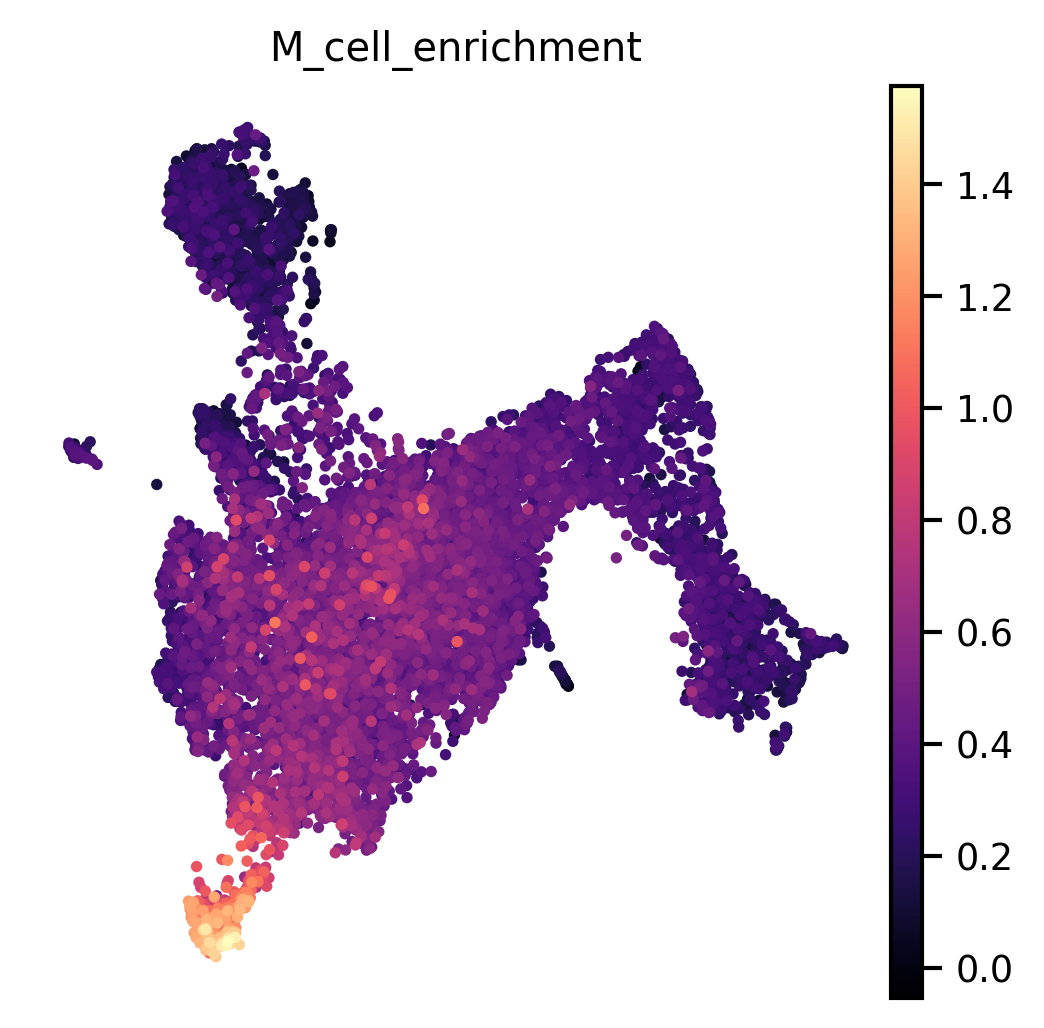

In [12]:
sc.pl.umap(
    adata,
    color="M_cell_enrichment",
    cmap="magma",
    s=30,
)

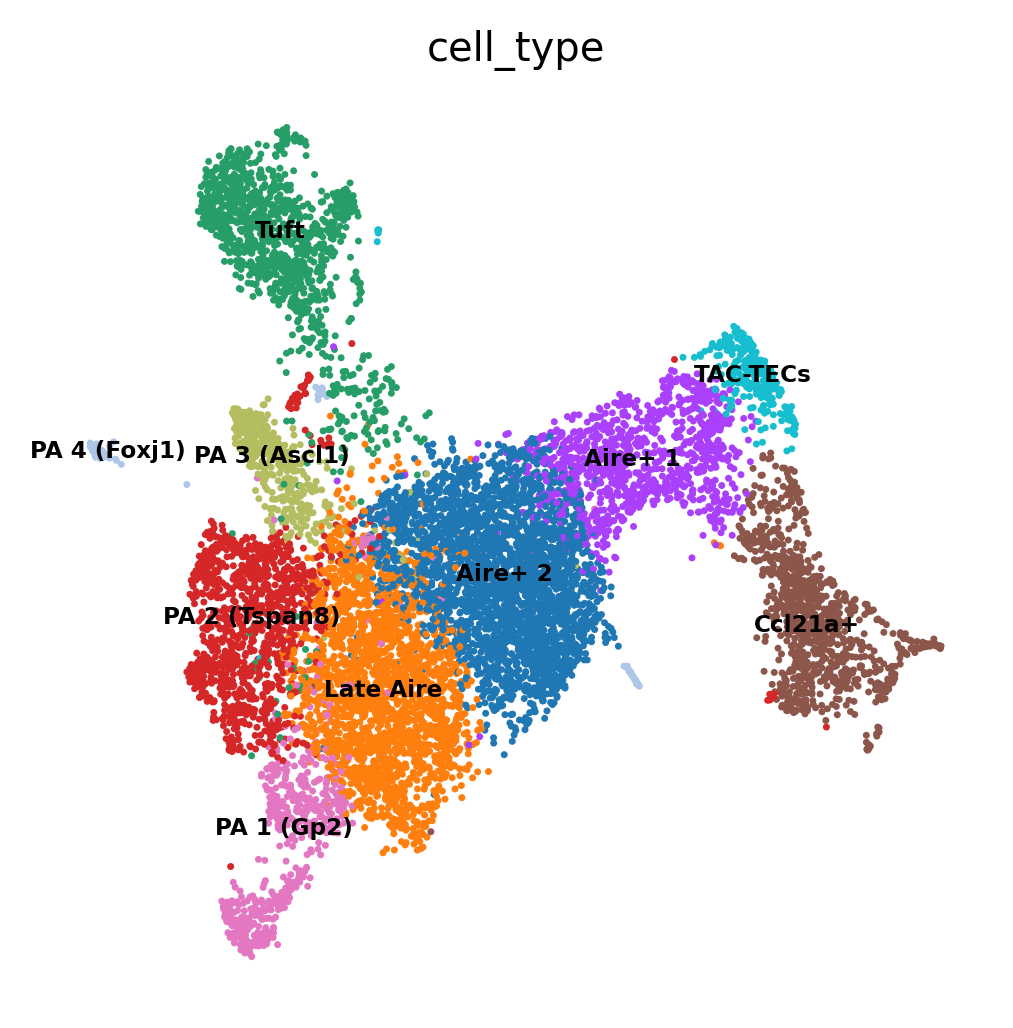

In [13]:
sc.pl.umap(
    adata,
    color=["cell_type"],
    legend_loc="on data",
    legend_fontsize="xx-small",
)

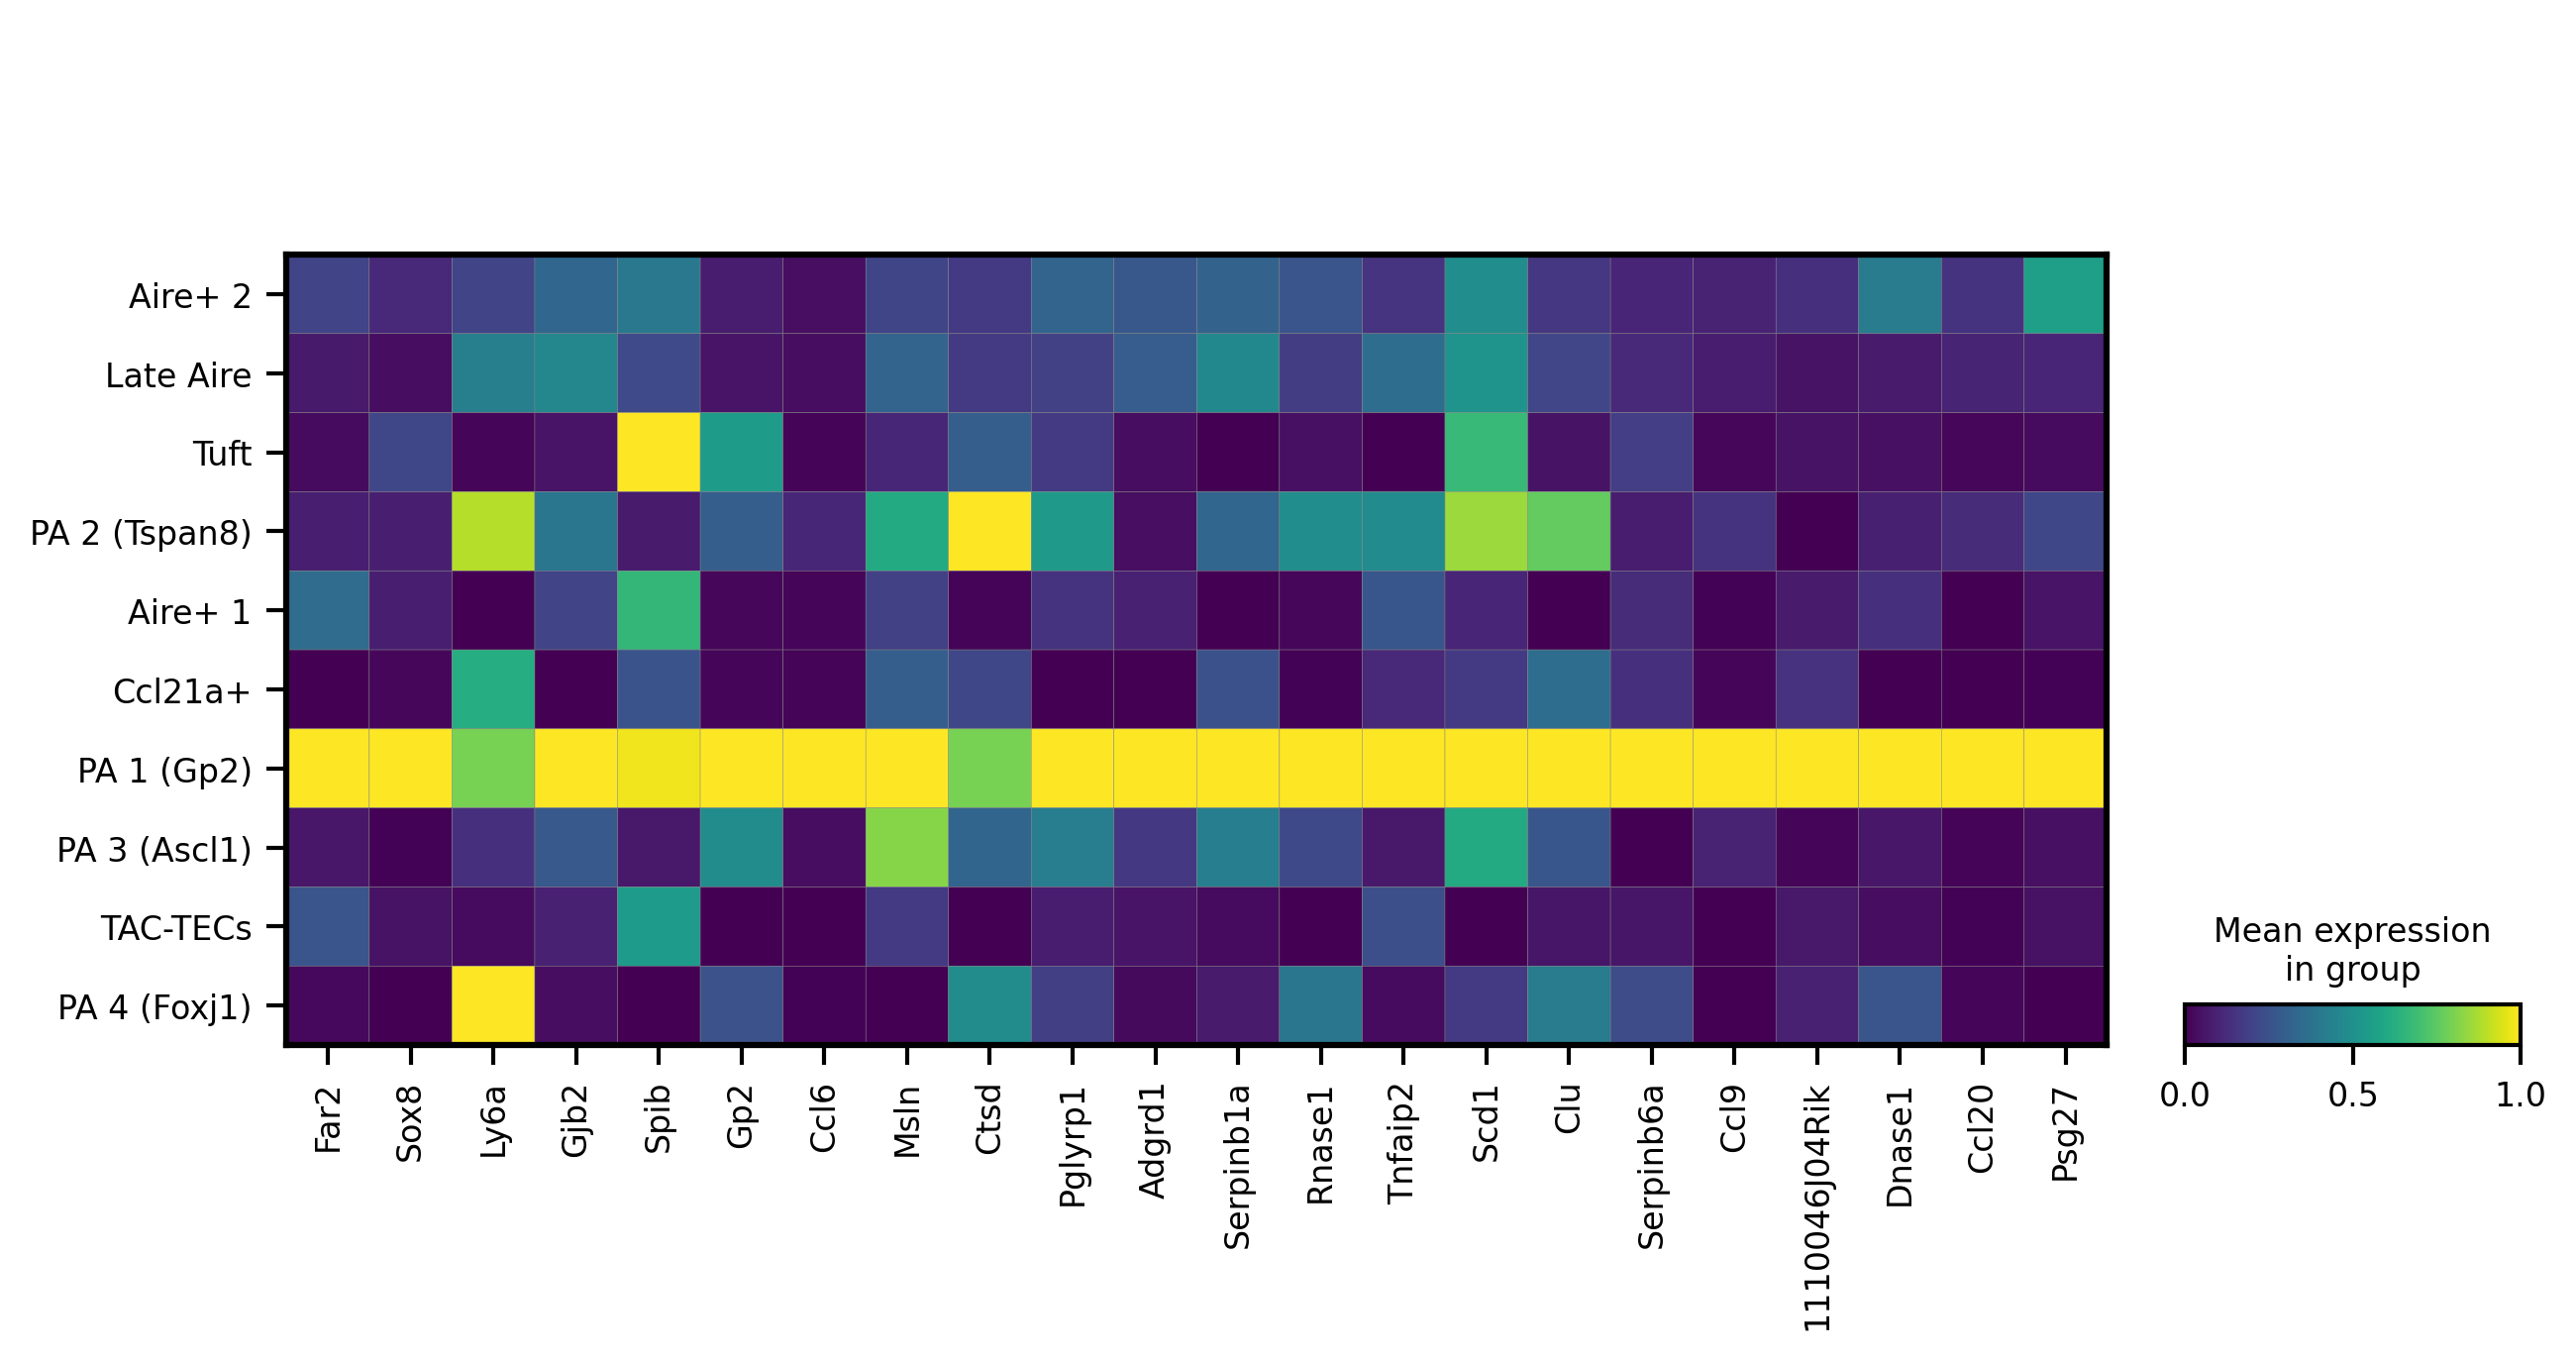

In [22]:
sc.pl.matrixplot(
    adata,
    var_names=[i for i in McellGenes if i in adata.var_names],
    groupby="cell_type",
    standard_scale="var",
    use_raw=True,
)

## DE comparison

In [16]:
McellDE = pd.read_csv("/notebook/Joe/M-cells/analysis/DE_all_cell_types/PA 1 (Gp2)_marker_genes.csv", index_col=0)

In [17]:
McellDE["rank"] = [i for i in range(1,len(McellDE)+1)]
McellDE

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2,rank
Clca4b,0.9836,0.0164,4.093937,0.002146,0.000157,0.0,0.25,4.816399,4.755647,2.700437,...,0.064576,0.295726,0.018085,14.786690,0.442210,True,PA 1 (Gp2) vs Rest,PA 1 (Gp2),Rest,1
2200002D01Rik,0.9778,0.0222,3.785212,0.008332,0.001392,0.0,0.25,3.008281,3.087113,1.579568,...,1.483228,0.948718,0.386672,78.213230,11.799204,True,PA 1 (Gp2) vs Rest,PA 1 (Gp2),Rest,2
Ccl6,0.9778,0.0222,3.785212,0.008462,0.000416,0.0,0.25,4.540420,4.675273,2.916675,...,0.274719,0.541880,0.066051,81.806310,1.616643,True,PA 1 (Gp2) vs Rest,PA 1 (Gp2),Rest,3
Muc13,0.9772,0.0228,3.757930,0.005219,0.000750,0.0,0.25,3.563968,3.546811,2.046772,...,0.740707,0.866667,0.163161,50.265533,4.793131,True,PA 1 (Gp2) vs Rest,PA 1 (Gp2),Rest,4
Ccl20,0.9736,0.0264,3.607636,0.022606,0.001474,0.0,0.25,4.068432,4.191935,2.755888,...,2.168395,0.757265,0.226066,326.378970,14.768926,True,PA 1 (Gp2) vs Rest,PA 1 (Gp2),Rest,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Csn2,0.9256,0.0744,2.520986,0.008996,0.006806,0.0,0.25,0.828855,0.600276,2.840352,...,8.394406,0.822222,0.654905,98.463440,79.670020,True,PA 1 (Gp2) vs Rest,PA 1 (Gp2),Rest,125
Serpinb6a,0.9252,0.0748,2.515192,0.024006,0.003157,0.0,0.25,2.219414,2.118584,1.988746,...,3.099673,0.950427,0.766365,310.247200,32.899284,True,PA 1 (Gp2) vs Rest,PA 1 (Gp2),Rest,126
Asprv1,0.9250,0.0750,2.512306,0.002952,0.001906,0.0,0.25,1.218635,1.225729,2.080166,...,3.028831,0.572650,0.392274,32.128685,22.233706,True,PA 1 (Gp2) vs Rest,PA 1 (Gp2),Rest,127
Ifi205,0.9248,0.0752,2.509426,0.000395,0.000629,0.0,0.25,0.040422,-0.041148,2.399996,...,0.474736,0.138462,0.167191,2.359344,4.696833,True,PA 1 (Gp2) vs Rest,PA 1 (Gp2),Rest,128


In [18]:
mCellGenesInData = [i for i in McellGenes if i in adata.var_names]

In [19]:
len(mCellGenesInData)

22

In [20]:
McellDE[McellDE.index.isin(mCellGenesInData)]

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2,rank
Ccl6,0.9778,0.0222,3.785212,0.008462,0.000416,0.0,0.25,4.540420,4.675273,2.916675,...,0.274719,0.541880,0.066051,81.806310,1.616643,True,PA 1 (Gp2) vs Rest,PA 1 (Gp2),Rest,3
Ccl20,0.9736,0.0264,3.607636,0.022606,0.001474,0.0,0.25,4.068432,4.191935,2.755888,...,2.168395,0.757265,0.226066,326.378970,14.768926,True,PA 1 (Gp2) vs Rest,PA 1 (Gp2),Rest,5
Ccl9,0.9680,0.0320,3.409496,0.006135,0.000602,0.0,0.25,3.506689,3.663194,2.507868,...,0.513463,0.752137,0.138589,65.015790,3.495031,True,PA 1 (Gp2) vs Rest,PA 1 (Gp2),Rest,8
Adgrd1,0.9588,0.0412,3.147244,0.003159,0.000625,0.0,0.25,2.697288,2.675339,2.303051,...,0.538328,0.598291,0.205917,30.767939,5.369260,True,PA 1 (Gp2) vs Rest,PA 1 (Gp2),Rest,22
Gp2,0.9564,0.0436,3.088119,0.007808,0.001343,0.0,0.25,2.513029,2.621595,3.362481,...,1.991872,0.442735,0.170533,99.487230,15.703446,True,PA 1 (Gp2) vs Rest,PA 1 (Gp2),Rest,30
Psg27,0.9500,0.0500,2.944439,0.000711,0.000270,0.0,0.25,2.425966,2.316963,2.871394,...,0.209062,0.176068,0.040397,4.724764,1.526050,True,PA 1 (Gp2) vs Rest,PA 1 (Gp2),Rest,50
Gjb2,0.9430,0.0570,2.806015,0.007641,0.002205,0.0,0.25,2.397761,2.116667,1.962496,...,2.378480,0.892308,0.482603,77.777280,22.312384,True,PA 1 (Gp2) vs Rest,PA 1 (Gp2),Rest,69
Serpinb1a,0.9428,0.0572,2.802300,0.027549,0.006271,0.0,0.25,2.519644,2.410849,1.937926,...,7.970679,0.984615,0.700118,351.471860,69.124810,True,PA 1 (Gp2) vs Rest,PA 1 (Gp2),Rest,70
Sox8,0.9418,0.0582,2.783907,0.000833,0.000209,0.0,0.25,1.619993,1.718950,2.439363,...,0.112541,0.425641,0.078730,7.458856,1.267484,True,PA 1 (Gp2) vs Rest,PA 1 (Gp2),Rest,74
Far2,0.9398,0.0602,2.747995,0.000328,0.000112,0.0,0.25,1.707740,1.742477,2.287312,...,0.061824,0.188034,0.041773,2.121158,0.692300,True,PA 1 (Gp2) vs Rest,PA 1 (Gp2),Rest,83
